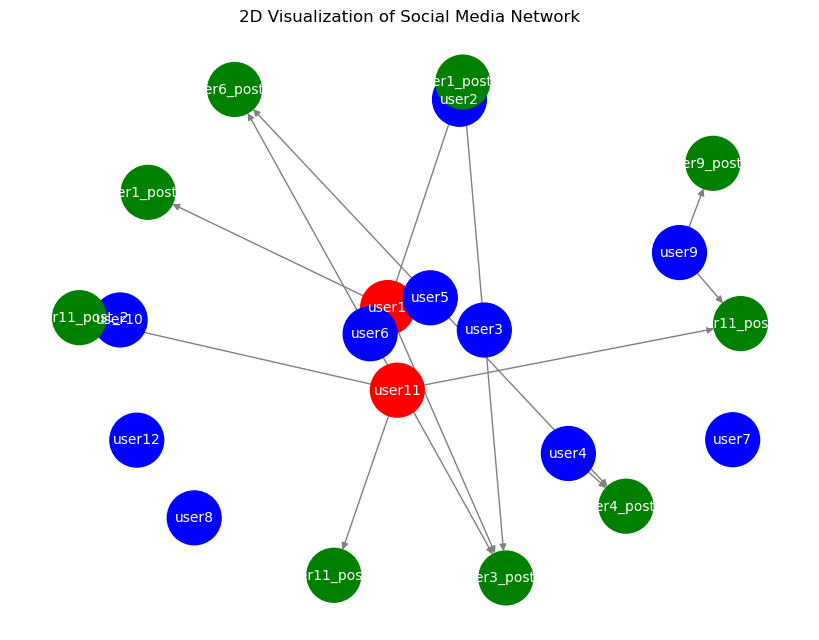

In [27]:
# create user instances with more variety
users = {}
users["user1"] = User("user1", "Alice", 25, "female", "North")
users["user2"] = User("user2", "Bob", 30, "male", "South")
users["user3"] = User("user3", "Charlie", 35, "male", "East")
users["user4"] = User("user4", "Daisy", 28, "female", "West")
users["user5"] = User("user5", "Eve", 32, "female", "Central")
users["user6"] = User("user6", "Frank", 40, "male", "North")
users["user7"] = User("user7", "Grace", 29, "female", "South")
users["user8"] = User("user8", "Hank", 45, "male", "East")
users["user9"] = User("user9", "Ivy", 26, "female", "North")
users["user10"] = User("user10", "Jack", 33, "male", "West")
users["user11"] = User("user11", "Karen", 37, "female", "South")
users["user12"] = User("user12", "Leo", 29, "male", "East")

# define connections
users["user1"].add_connection("friends", "user2")
users["user1"].add_connection("friends", "user3")
users["user2"].add_connection("friends", "user1")
users["user2"].add_connection("co-worker", "user4")
users["user3"].add_connection("follows", "user1")
users["user4"].add_connection("follows", "user3")
users["user5"].add_connection("friends", "user4")
users["user6"].add_connection("friends", "user7")
users["user9"].add_connection("friends", "user10")
users["user11"].add_connection("friends", "user12")

# define posts
users["user1"].add_post("Hello World!", "2024-01-01T10:00:00")
users["user1"].add_post("Reflections on 2024", "2024-01-02T11:00:00")
users["user3"].add_post("How to start coding?", "2024-02-01T09:00:00")
users["user4"].add_post("The beauty of sunsets", "2024-03-10T18:00:00")
users["user6"].add_post("Mountain climbing adventures", "2024-04-15T07:30:00")
users["user9"].add_post("Exploring local cafes", "2024-05-01T15:00:00")
users["user11"].add_post("Best recipes for spring", "2024-05-05T14:00:00")
users["user11"].add_post("The joy of gardening", "2024-05-06T10:30:00")
users["user11"].add_post("Creative crafts for kids", "2024-05-07T13:00:00")

# define interactions
users["user1"].add_comment(0, "Nice post!", "user2", "2024-01-01T11:00:00")
users["user1"].add_view(0, "user3", "2024-01-01T11:15:00")
users["user1"].add_like(0, "user2")
users["user3"].add_comment(0, "Great question!", "user1", "2024-02-01T09:30:00")
users["user3"].add_like(0, "user6")
users["user4"].add_comment(0, "I love sunsets too!", "user5", "2024-03-10T18:20:00")
users["user6"].add_comment(0, "Looks amazing!", "user5", "2024-04-15T08:00:00")
users["user11"].add_comment(1, "Great gardening tips!", "user9", "2024-05-06T11:00:00")
users["user11"].add_view(2, "user10", "2024-05-07T13:30:00")

# build a directed graph
G = nx.DiGraph()

# add users as nodes
for user in users.values():
    G.add_node(user.username, label="User", **vars(user))

# add posts and interactions as nodes and edges
for user in users.values():
    for idx, post in enumerate(user.posts):
        post_id = f"{user.username}_post_{idx}"
        G.add_node(post_id, label="Post", content=post["content"])
        G.add_edge(user.username, post_id, relation="author")
        for view in post["views"]:
            G.add_edge(view["viewer"], post_id, relation="viewed")
        for comment in post["comments"]:
            G.add_edge(comment["author"], post_id, relation="commented")
        for liker in post["likes"]:
            G.add_edge(liker, post_id, relation="liked")


# function to highlight interesting users
def highlight_interesting_users(criteria):
    interesting_users = []
    for node in G.nodes(data=True):
        if node[1]["label"] == "User":
            user = node[1]
            if criteria(user):
                interesting_users.append(node[0])
    return interesting_users


# example criteria for highlighting
def example_criteria(user):
    return user["gender"] == "female" and len(user["posts"]) > 1


# get interesting users based on criteria
interesting_users = highlight_interesting_users(example_criteria)

# visualize graph in 2D
def visualize_2d():
    plt.figure(figsize=(8, 6))  # compact visualization size
    pos = nx.spring_layout(G, seed=42, k=0.1)  # decrease k to bring nodes closer
    node_colors = [
        "red" if node in interesting_users else "blue" if G.nodes[node]["label"] == "User" else "green"
        for node in G.nodes
    ]
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        node_size=1500,  # larger node size for better visibility
        font_size=10,  # make text readable
        font_color="white",
        edge_color="gray",
    )
    plt.title("2D Visualization of Social Media Network")
    plt.show()


# run visualization
visualize_2d()
